# 1. Importamos las librerias necesarias

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from src.cleaning import country_n

USA


# 2. Abrimos el Dataset


In [7]:
sharks = pd.read_csv('./data/attacks.csv', encoding = 'ISO - 8859-1')
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


#### El dataset 'attacks' tiene 25723 filas y 24 columnas

In [8]:
sharks.shape

(25723, 24)

# 3. Hipotesis: ¿en qué país han atacado más tiburones?
Analizaré los datos teniendo en cuenta:
  
    - Sex
    - Age 

In [9]:
#Muestro las columnas

In [10]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [11]:
#Quito los espacios 

In [12]:
sharks.columns = sharks.columns.str.rstrip()

In [13]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [14]:
# Elimino las columnas que no me interesan

In [15]:
sharks = sharks.drop(['Time','pdf','href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Investigator or Source', 'Fatal (Y/N)', 'Type', 'Date', 'Case Number', 'Species', 'Area'], axis = 1 )

In [16]:
sharks.shape

(25723, 8)

In [17]:
sharks.head()

,Year,Country,Location,Activity,Name,Sex,Age,Injury
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad..."
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg
3,2018.0,AUSTRALIA,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg
4,2018.0,MEXICO,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT


In [18]:
#Compruebo los datos nulos y los elimino.

In [19]:
sharks.isnull().sum().sort_values(ascending=False)

Age         22252
Sex         19986
Activity    19965
Location    19961
Name        19631
Country     19471
Injury      19449
Year        19423
dtype: int64

In [20]:
sharks.dropna()

,Year,Country,Location,Activity,Name,Sex,Age,Injury
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad..."
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg
6,2018.0,BRAZIL,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL
7,2018.0,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT
...,...,...,...,...,...,...,...,...
6242,0.0,IRAQ,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed
6243,0.0,IRAQ,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated
6254,0.0,CUBA,Cojimar,"Shark fishing, knocked overboard",Sandrillio,M,50,"FATAL, hip bitten PROVOKED INCIDENT"
6265,0.0,IRAQ,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss"


In [21]:
#Voy a trabajar con una dataset de 3163 filas y 8 columnas

In [22]:
#Compruebo los Países y confirmo los que tienen más ataques.

In [23]:
sharks['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [24]:
sharks['Country'].value_counts()

USA                         2229
AUSTRALIA                   1338
SOUTH AFRICA                 579
PAPUA NEW GUINEA             134
NEW ZEALAND                  128
                            ... 
Sierra Leone                   1
RED SEA?                       1
NORTHERN MARIANA ISLANDS       1
RED SEA                        1
GUATEMALA                      1
Name: Country, Length: 212, dtype: int64

<AxesSubplot:title={'center':'Countries with more attacks'}, ylabel='Country'>

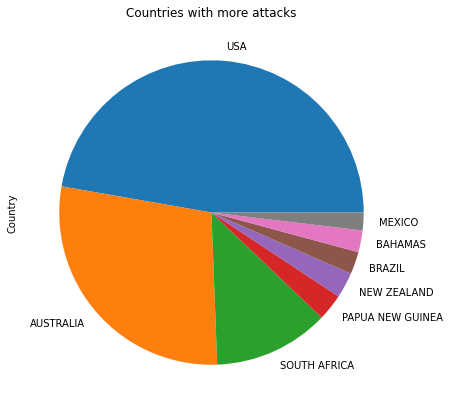

In [25]:
sharks["Country"].value_counts().nlargest(8).plot.pie(figsize = (7,7), title = "Countries with more attacks")

In [26]:
sharks.groupby(['Country']).get_group('USA')

,Year,Country,Location,Activity,Name,Sex,Age,Injury
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad..."
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg
7,2018.0,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT
8,2018.0,USA,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten
...,...,...,...,...,...,...,...,...
6249,0.0,USA,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle
6283,0.0,USA,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,2-inch lacerations
6288,0.0,USA,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg"""
6292,0.0,USA,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten


## El país con mas ataques es USA. 
- Creo un nuevo dataset

- Cuento los duplicados los elimino.

In [27]:
sharks_usa = sharks[(sharks["Country"]== "USA")]
sharks_usa.sample(10)

,Year,Country,Location,Activity,Name,Sex,Age,Injury
4571,1947.0,USA,"Santa Monica, Los Angeles County",Fishing,Philip Dorn,M,46,PROVOKED INCIDENT
887,2011.0,USA,"Myrtle Beach, Horry County",Playing in the surf,Rudy Varney,M,7,Puncture wounds to foot
4409,1952.0,USA,"Mona Island, 40 miles west of the mainland","Spearfishing, carrying fish on spear",Juan Suarez Morales,M,NaN,Leg lacerated & bone fractured
2282,1996.0,USA,"New Smyrna Beach, Volusia County",Surfing / Swimming,John Perkins,M,19,Small puncture wounds and lacerations on right...
3470,1968.0,USA,"Mullet Key, Pinellas County",Clamming,Peter Nash,M,17,Lacerations to lower right leg & andkle
2481,1993.0,USA,Pamlico Sound,Riding floatation device,Petra Rijoes,F,19,Severe lacerations to abdomen & thighs
2040,2000.0,USA,"Daytona Beach, Volusia County",Wading,Niesha Peterson,F,20,Left inner thigh
5457,1907.0,USA,"Garden Key, Charlotte County","Fishing, tarpon being chased by shark leapt ...",Belton Larkin,M,NaN,"FATAL, shark bit his side, nearly cutting him ..."
2973,1982.0,USA,"Point Buchon, San Luis Obispo County",Paddle Boarding,Casimir Pulaski,M,26,"No Injury, board bitten"
4985,1932.0,USA,Galveston,NaN,male,M,17,Body recovered from 9' shark but death due to...


In [28]:
sharks_usa.duplicated().value_counts()

False    2228
True        1
dtype: int64

In [29]:
sharks_usa.drop_duplicates()
sharks.head()

,Year,Country,Location,Activity,Name,Sex,Age,Injury
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad..."
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg
3,2018.0,AUSTRALIA,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg
4,2018.0,MEXICO,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT


## Analizo la  columna Sex:
Reemplazo F-Female y M-Male.

In [30]:
sharks_usa['Sex'].replace('F','Female', inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [31]:
sharks_usa['Sex'].replace('M','Male', inplace=True)

In [32]:
sharks_usa

,Year,Country,Location,Activity,Name,Sex,Age,Injury
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,57,"No injury to occupant, outrigger canoe and pad..."
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,11,Minor injury to left thigh
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,Male,48,Injury to left lower leg from surfboard skeg
7,2018.0,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,Male,52,Minor injury to foot. PROVOKED INCIDENT
8,2018.0,USA,"Cocoa Beach, Brevard County",Walking,Cody High,Male,15,Lower left leg bitten
...,...,...,...,...,...,...,...,...
6249,0.0,USA,"Palm Beach, Palm Beach County",Standing,Horton Chase,Male,NaN,Abrasions & bruises hip to ankle
6283,0.0,USA,"Gadsden Point, Tampa Bay",Fishing,James Kelley,Male,NaN,2-inch lacerations
6288,0.0,USA,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",Male,NaN,"""Lost leg"""
6292,0.0,USA,Puna,NaN,"A ""chiefess""",Female,NaN,Ankle bitten


In [33]:
sharks_usa['Sex'].value_counts()

Male      1792
Female     337
lli          1
M            1
Name: Sex, dtype: int64

### Me encuentro que hay dos valores que no son Male ni Female y los analizo

In [34]:
sharks_usa.loc[sharks_usa['Sex'] == 'M ']

,Year,Country,Location,Activity,Name,Sex,Age,Injury
563,2014.0,USA,"Cocoa Beach, Brevard County",Swimming,male,M,42,Laceration & puncture wounds to right foot


In [35]:
sharks_usa.loc[563]

Year                                            2014.0
Country                                            USA
Location                  Cocoa Beach, Brevard  County
Activity                                      Swimming
Name                                              male
Sex                                                 M 
Age                                                 42
Injury      Laceration & puncture wounds to right foot
Name: 563, dtype: object

In [36]:
sharks_usa['Sex'].replace('M ','Male', inplace = True)

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [37]:
sharks_usa['Sex'].value_counts()

Male      1793
Female     337
lli          1
Name: Sex, dtype: int64

In [38]:
sharks_usa.loc[sharks_usa['Sex'] == 'lli']

,Year,Country,Location,Activity,Name,Sex,Age,Injury
1624,2004.0,USA,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh"


In [39]:
sharks_usa.loc[1624]

Year                                                2004.0
Country                                                USA
Location    Bunkers, Humboldt Bay, Eureka, Humboldt County
Activity                                           Surfing
Name                                            Brian Kang
Sex                                                    lli
Age                                                     38
Injury                  Lacerations to hand, knee & thigh 
Name: 1624, dtype: object

In [40]:
sharks_usa['Sex'].replace('lli','Male', inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [41]:
sharks_usa['Sex'].value_counts()

Male      1794
Female     337
Name: Sex, dtype: int64

In [42]:
#https://www.chicagotribune.com/news/ct-xpm-2004-11-14-0411140270-story.html

<AxesSubplot:xlabel='Sex', ylabel='count'>

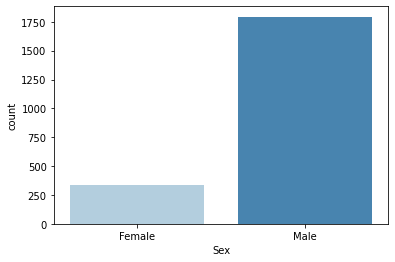

In [43]:
# Representación gráfica Female vs Male.
sns.countplot(x= sharks_usa.Sex, palette="Blues")

### Observo que en la coluna de los años, hay diferentes formas expresadas y quiero crear a través de un patrón una cifra de dos valores.

In [44]:
sharks_usa['Age'].value_counts()


16          68
15          67
17          65
19          61
18          59
            ..
86           1
mid-20s      1
75           1
Teens        1
12 or 13     1
Name: Age, Length: 100, dtype: int64

In [45]:
sharks_usa['Age'].unique()

array(['57', '11', '48', '52', '15', '12', '10', '29', '25', '54', '35',
       '14', nan, '17', '60', '40', '33', '28', '18', '3', '69', '13',
       '34', '8', '50', '46', '16', '19', '20', '21', '51', '58', '22',
       'Teen', '47', '41', '42', '36', '66', '32', '43', '60s', '9', '37',
       '49', '61', '59', '6', '27', '64', '23', '26', '71', '44', '31',
       '38', '39', '68', '30', '65', '63', '70', '53', '7', '20s', '45',
       '50s', 'teen', '56', '24', '55', '30s', '5', '86', '12 or 13',
       '62', 'Teens', '8 or 10', '\xa0 ', '6½', 'mid-30s', '73',
       '23 & 20', '7      &    31', ' 28', "60's", '87', '67', '77',
       'Elderly', 'mid-20s', 'Ca. 33', '75', '21 or 26', 'adult',
       '9 & 12', '37, 67, 35, 27,  ? & 27', ' 43', '?    &   14',
       '10 or 12', 'young'], dtype=object)

In [46]:
!pip3 install regex

In [47]:
#pattern = (\d{2}) -- findall (patrón, string)
#Quiero escoger sólo las edades de dos valores.
import re
import statistics
def ages(i):
    try:
        pattern = r'(\d{2})'
        busca = re.findall(pattern, i)
        return int(busca[0])

    except:
        return np.nan

In [48]:
ages('25 or 30')

25

In [49]:
#Creo una nueva columna y aplico la función
sharks_usa['Ages'] = sharks_usa['Age'].apply(ages)

<ipython-input-49-27d674de7739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa['Ages'] = sharks_usa['Age'].apply(ages)


In [50]:
#Muestro los valores únicos y tengo nan; los elimino.
sharks_usa['Ages'].unique()

array([57., 11., 48., 52., 15., 12., 10., 29., 25., 54., 35., 14., nan,
       17., 60., 40., 33., 28., 18., 69., 13., 34., 50., 46., 16., 19.,
       20., 21., 51., 58., 22., 47., 41., 42., 36., 66., 32., 43., 37.,
       49., 61., 59., 27., 64., 23., 26., 71., 44., 31., 38., 39., 68.,
       30., 65., 63., 70., 53., 45., 56., 24., 55., 86., 62., 73., 87.,
       67., 77., 75.])

In [51]:
sharks_usa['Ages'].isnull().sum()

817

In [52]:
sharks_usa['Ages'].dropna()

0       57.0
1       11.0
2       48.0
7       52.0
8       15.0
        ... 
6036    15.0
6061    15.0
6089    52.0
6200    21.0
6226    19.0
Name: Ages, Length: 1412, dtype: float64

In [53]:
sharks_usa['Ages'].value_counts()

16.0    68
15.0    67
17.0    65
19.0    61
18.0    59
        ..
64.0     1
75.0     1
86.0     1
87.0     1
73.0     1
Name: Ages, Length: 67, dtype: int64

In [54]:
sharks_usa.head()

,Year,Country,Location,Activity,Name,Sex,Age,Injury,Ages
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,57,"No injury to occupant, outrigger canoe and pad...",57.0
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,11,Minor injury to left thigh,11.0
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,Male,48,Injury to left lower leg from surfboard skeg,48.0
7,2018.0,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,Male,52,Minor injury to foot. PROVOKED INCIDENT,52.0
8,2018.0,USA,"Cocoa Beach, Brevard County",Walking,Cody High,Male,15,Lower left leg bitten,15.0


In [55]:
#Elimino la columna Age y me quedo con la de Ages.
sharks_usa = sharks_usa.drop(['Age'], axis = 1 )
sharks_usa.head()

,Year,Country,Location,Activity,Name,Sex,Injury,Ages
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",57.0
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Minor injury to left thigh,11.0
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,Male,Injury to left lower leg from surfboard skeg,48.0
7,2018.0,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,Male,Minor injury to foot. PROVOKED INCIDENT,52.0
8,2018.0,USA,"Cocoa Beach, Brevard County",Walking,Cody High,Male,Lower left leg bitten,15.0


In [56]:
#Encuentro que hay 68 valores únicos.
len(sharks_usa['Ages'].unique())

68

<AxesSubplot:xlabel='Sex', ylabel='count'>

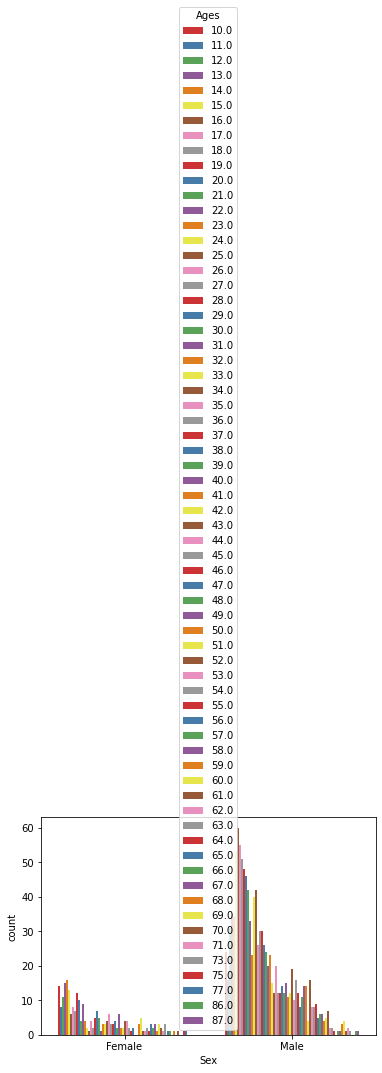

In [57]:
# A la hora de representarlos en un gráfico, no queda claro.
sns.countplot(x= sharks_usa.Sex, hue=sharks_usa.Ages, palette="Set1")

<AxesSubplot:xlabel='Ages', ylabel='count'>

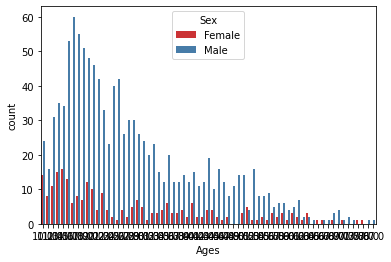

In [58]:
#Aquí tampoco.
sns.countplot(x= sharks_usa.Ages, hue=sharks_usa.Sex, palette="Set1")

In [70]:
#Por eso decido crear una nueva columna con rango de edades.
sharks_usa['Agebucket'] = pd.cut(sharks_usa.Ages, bins=[0, 10, 20, 30, 50, 60, 70, 100])
sharks_usa.head()

,Year,Country,Location,Activity,Name,Sex,Injury,Ages,Agebucket
0,2018.0,USA,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",57.0,"(50, 60]"
1,2018.0,USA,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Minor injury to left thigh,11.0,"(10, 20]"
2,2018.0,USA,"Habush, Oahu",Surfing,John Denges,Male,Injury to left lower leg from surfboard skeg,48.0,"(30, 50]"
7,2018.0,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,Male,Minor injury to foot. PROVOKED INCIDENT,52.0,"(50, 60]"
8,2018.0,USA,"Cocoa Beach, Brevard County",Walking,Cody High,Male,Lower left leg bitten,15.0,"(10, 20]"


<AxesSubplot:xlabel='Agebucket', ylabel='count'>

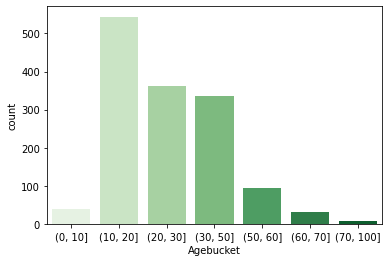

In [71]:
sns.countplot(x=sharks_usa.Agebucket, palette="Greens")

<AxesSubplot:xlabel='Ages'>

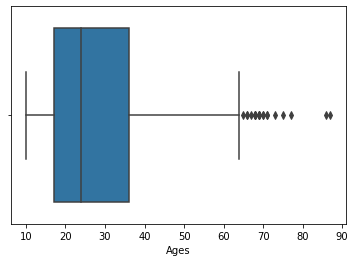

In [72]:
sns.boxplot(x="Ages", data=sharks_usa)

In [73]:
#La edad media de los atacados es:
sharks_usa['Ages'].mean()

27.78611898016997

In [74]:
#La persona con más edad atacada:
sharks_usa['Ages'].max()

87.0

In [75]:
sharks_usa.loc[sharks_usa['Ages'] == 87]

,Year,Country,Location,Activity,Name,Sex,Injury,Ages,Agebucket
2846,1985.0,USA,"Palmetto Dunes, Hilton Head, Beaufort County",Wading,Joseph Friedlander,Male,Right calf bitten & less serious injury to lef...,87.0,"(70, 100]"


In [76]:
#El señor Joseph Friedlander fue atacado en 1985, no fue fatal (mordida en la pantorrilla derecha y lesión menos grave en el pie izquierdo)

In [67]:
#las actividades en las que más ataque ha habido es surfing.
sharks_usa['Activity'].value_counts()

Surfing                                    564
Swimming                                   310
Fishing                                    115
Wading                                     101
Standing                                    57
                                          ... 
Free diving & spearfishing (descending)      1
Casting a net                                1
Standing alongside surfboard                 1
Fishing for trout                            1
Wading in school of baitfish                 1
Name: Activity, Length: 508, dtype: int64

In [ ]:
sharks_usa['Activity']=value_counts()

In [ ]:
def country_n(name):
    return name.upper()
print(country_n("USA"))